<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.878 · TFM · Área 1</p>
<p style="margin: 0; text-align:right;">2025 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Detección y Prevención del Fraude en el Sector Financiero
# Estrategias Basadas en Machine Learning


El objetivo de este trabajo ha sido desarrollar un modelo eficaz de Machine Learning para detectar fraude financiero basado en el análisis de datos transaccionales. 

Se ha desarrollado un sistema de detección de fraude que combina métodos de aprendizaje automático y un conjunto flexible de reglas dinámicas, cuya idea principal es proporcionar análisis de transacciones automatizado con la capacidad de actualizar de manera flexible los criterios de fraude.

El enfoque planificado no sólo debería ser eficaz en términos de precisión de las predicciones, sino también adaptarse a las condiciones cambiantes de manera inmediata. 


## 1. Carga de librerías y exploración inicial de los datos


In [1]:
# Importar todas las librerias necesarias
!pip install --upgrade scikit-learn --quiet

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Preparar la ruta del dataset

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.0 MB/s eta 0:00:00:00:01:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# Cargar el dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Mostrar la informacion basica de los datos
print("\nInformación basica:")
print(df.info())

# Mostarar estadisticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Mostrar el tamaño del dataset
print("\nTamaño del dataset:", df.shape)


Información basica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [4]:
# Mostrar valores nulos
print("Valores nulos:\n", df.isnull().sum())

# Mostrar duplicados
dupl = df.duplicated().sum()
print("Lineas duplicadas:\n", dupl)

Valores nulos:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Lineas duplicadas:
 1081


Distribución de Clases:
 Class
0    284315
1       492
Name: count, dtype: int64


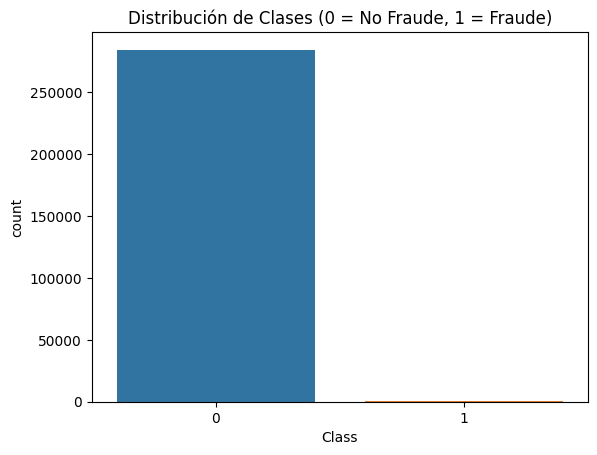

Porcentaje de cada Clase:
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [5]:
# Comprobar la distribucion de las clases

print("Distribución de Clases:\n",df['Class'].value_counts())

sns.countplot(data=df, x='Class')
plt.title('Distribución de Clases (0 = No Fraude, 1 = Fraude)')
plt.show()

distr_pct = df['Class'].value_counts(normalize=True) * 100
print("Porcentaje de cada Clase:\n", distr_pct)

## 2. Preprocesamiento de los datos

Como hemos podido observar en el análisis inicial de los datos, el mayor problema de la calidad de los datos es la proporción de las transacciones legítimas y fraudulentas. Vamos a aplicar la técnica SMOTE para solucionar el problema y además vamos a escalar las variables Amount y Time para que sea más fácil trabajar con ellas.

In [6]:
# Preparar los conjuntos de entrenamiento y prueba
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Escalar las variables Amount y Time 
scaler = StandardScaler()
X_train['scaled_amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_train['scaled_time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['scaled_amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))
X_test['scaled_time'] = scaler.transform(X_test['Time'].values.reshape(-1, 1))

X_train = X_train.drop(['Amount', 'Time'], axis=1)
X_test = X_test.drop(['Amount', 'Time'], axis=1)

In [8]:
# Aplicar SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

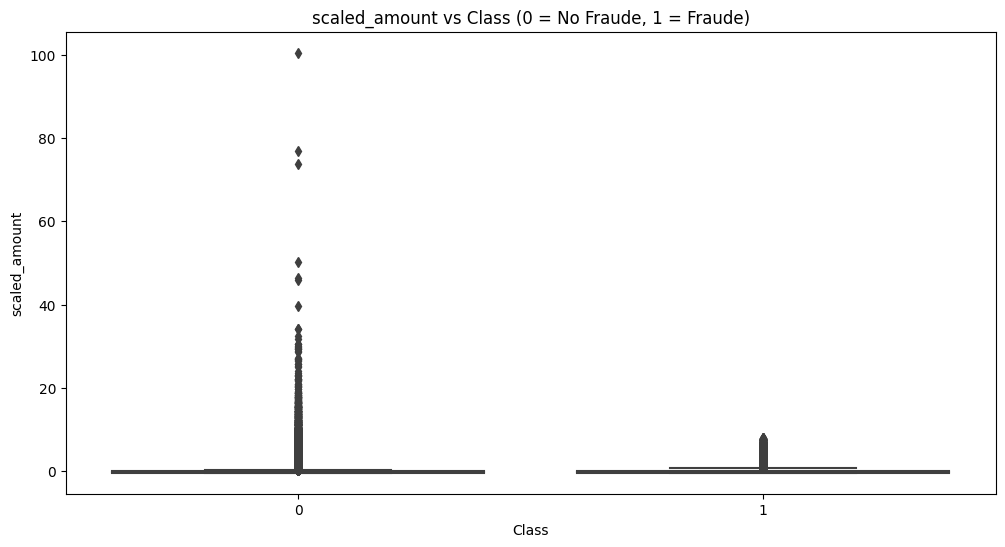

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


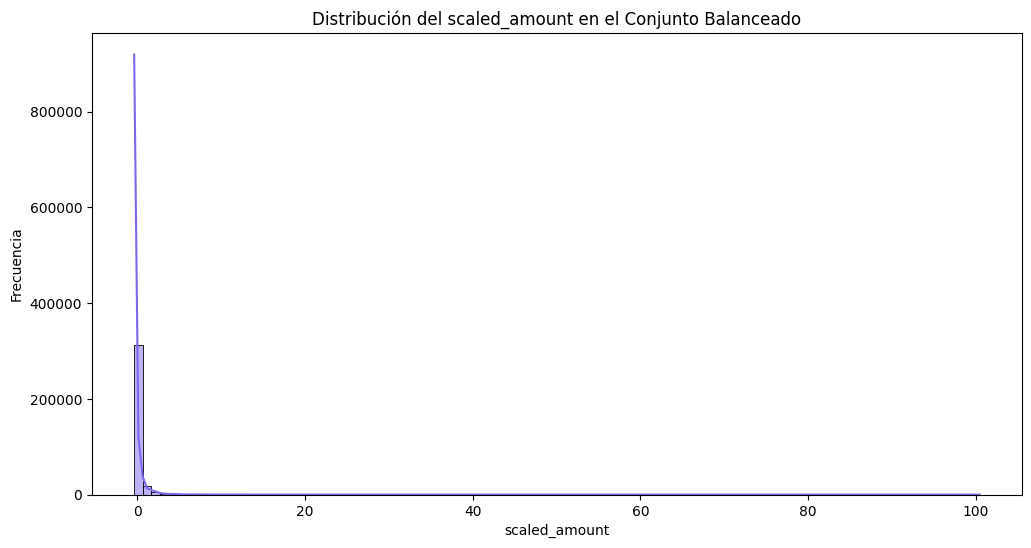

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


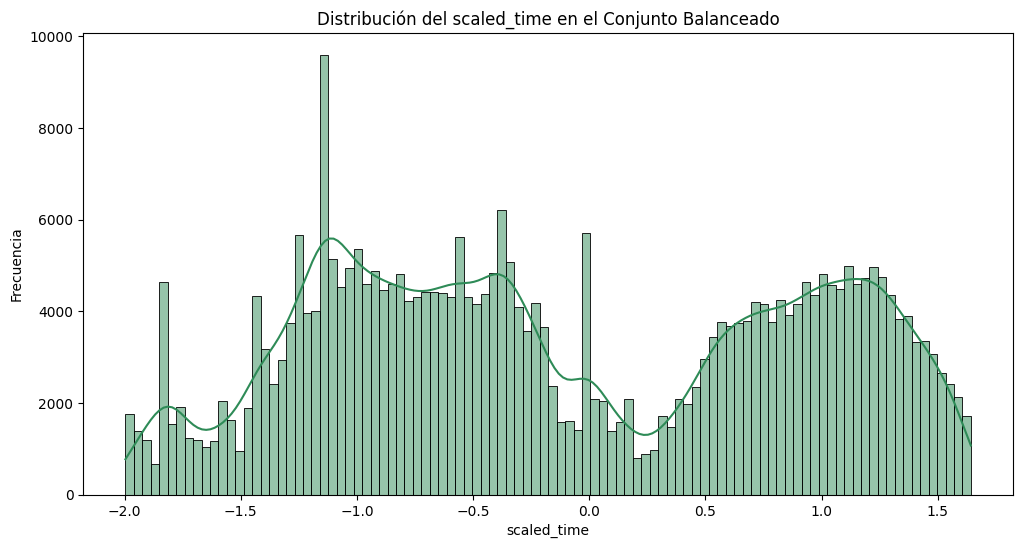

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


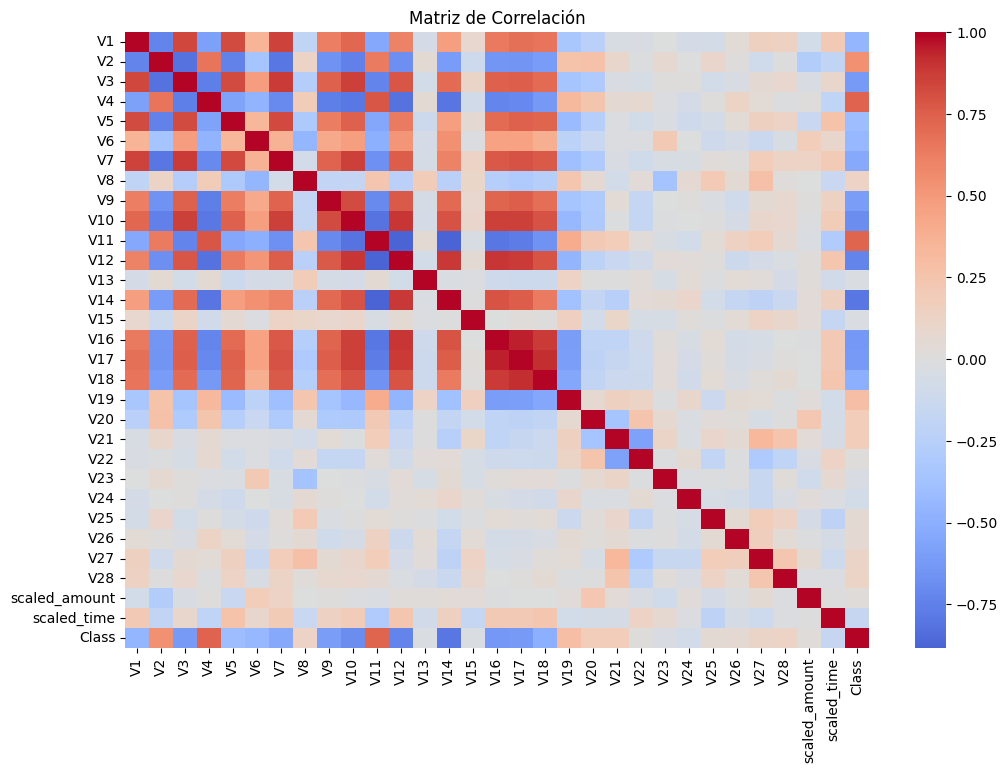

Variables más correlacionadas con la variable Class:
 Class    1.000000
V4       0.736775
V11      0.727578
V2       0.543598
V19      0.289694
V21      0.181958
V20      0.179098
V8       0.128497
V28      0.117981
V27      0.117121
Name: Class, dtype: float64


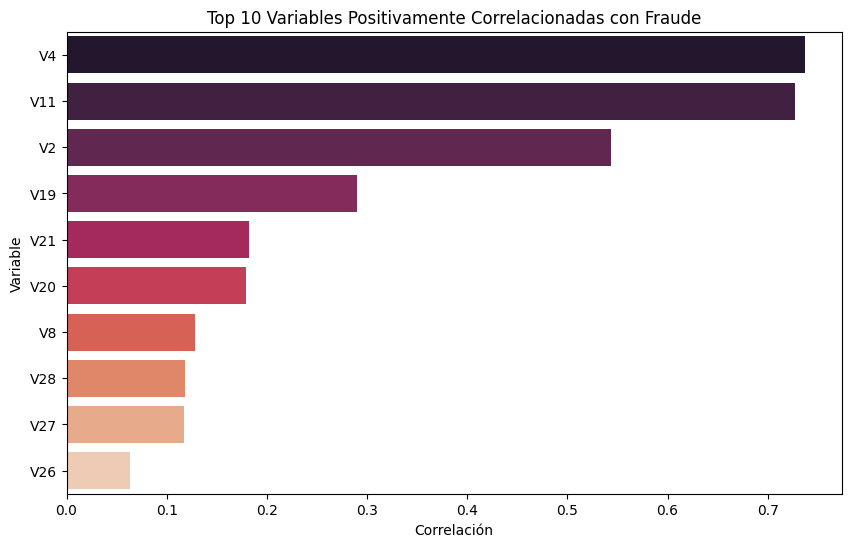

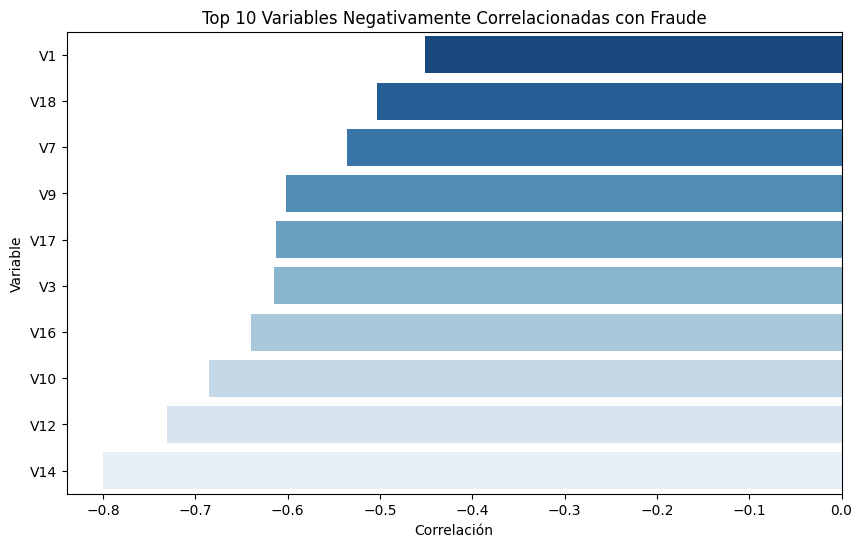

In [9]:
# Visualizar los datos
df_balanced = pd.DataFrame(X_resampled, columns=X_train.columns)
df_balanced['Class'] = y_resampled

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='scaled_amount', data=df_balanced)
plt.title('scaled_amount vs Class (0 = No Fraude, 1 = Fraude)')
plt.xlabel('Class')
plt.ylabel('scaled_amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_balanced['scaled_amount'], bins=100, kde=True, color='mediumslateblue')
plt.title('Distribución del scaled_amount en el Conjunto Balanceado')
plt.xlabel('scaled_amount')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_balanced['scaled_time'], bins=100, kde=True, color='seagreen')
plt.title('Distribución del scaled_time en el Conjunto Balanceado')
plt.xlabel('scaled_time')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
corr_matrix = df_balanced.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

correlaciones = df_balanced.corr()['Class'].sort_values(ascending=False)
print("Variables más correlacionadas con la variable Class:\n", correlaciones.head(10))

corr_con_fraude = df_balanced.corr()['Class'].drop('Class').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_con_fraude.values[:10], y=corr_con_fraude.index[:10], palette='rocket')
plt.title('Top 10 Variables Positivamente Correlacionadas con Fraude')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_con_fraude.values[-10:], y=corr_con_fraude.index[-10:], palette='Blues_r')
plt.title('Top 10 Variables Negativamente Correlacionadas con Fraude')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()

## 3. Creación y entrenamiento del modelo

In [10]:
# Entrenar modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Hacer predicciones
X_test_modelo = X_test.copy()
y_pred = xgb_model.predict(X_test_modelo)

In [11]:
# Evaluar el modelo
print("Metricas del modelo XGBoost:")
print(classification_report(y_test, y_pred))

metrics_xgb = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred)
}

Metricas del modelo XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.86      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## 4. Aplicación de la reglas dinámicas

Una vez creado y entrenado el modelo podemos proceder con la aplicación de las reglas ad-hoc.

In [12]:
X_test_reglas = X_test.copy()
X_test_reglas['fraud_prediction'] = y_pred

# Contar las transacciones que cumplen las regla dinámicas

reglas = (
    (X_test_reglas['scaled_amount'] > 0.9) |
    (X_test_reglas['scaled_time'] < -1.9) &
    (X_test_reglas['fraud_prediction'] == 0)
)

# Mostrar transacciones que cumplen las reglas dinámicas
num_trans_reglas = reglas.sum()
print(f"\nTransacciones que cumplen las reglas dinámicas: {num_trans_reglas}")
display(X_test_reglas[reglas].head(10))


🔍 Transacciones que cumplen las reglas dinámicas: 1017

Transacciones que cumplen las reglas dinámicas:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,fraud_prediction
2148,1.241253,-0.107798,0.432991,-0.121891,-0.790021,-0.980616,-0.218998,-0.019842,0.196839,0.020728,...,-0.267594,0.076490,0.568786,0.134627,0.934921,-0.096797,-0.007563,-1.996073,-1.961229,0
1831,-1.805552,1.671304,0.619620,-0.976160,-0.458580,-0.548157,0.134674,0.681750,0.606681,0.564207,...,-0.561867,-0.026061,-0.027794,-0.031312,0.321154,0.580264,0.345711,-1.996100,-1.966177,0
2231,-0.640106,-0.014125,1.009867,-1.866220,0.000452,-0.746637,0.434067,-0.063813,-1.653938,0.329208,...,0.930371,-0.067886,0.052395,0.018214,-0.325211,0.327599,0.199766,-1.994630,-1.959123,0
4523,-0.135844,0.140612,1.480959,-1.135779,0.213653,0.209191,0.517702,-0.574806,0.624232,0.326630,...,-0.084275,-0.248024,-0.470722,-0.182614,-0.453076,-0.722735,-0.650468,-1.995283,-1.915302,0
1131,-2.512192,0.317838,1.270333,1.214258,1.179903,-0.412233,1.002716,-0.774680,1.656602,2.779074,...,0.242368,-0.135074,0.104261,0.211102,-0.287307,0.335129,0.328212,-1.995726,-1.977633,0
4734,-0.846989,1.323505,1.425198,0.093438,-0.159451,-0.228827,0.074472,0.552151,0.440827,-0.780896,...,-0.525292,0.084526,0.143834,-0.322692,0.034621,0.126771,0.040075,-1.996072,-1.908247,0
920,1.330876,-0.241450,-0.139078,-0.562309,0.008856,0.272339,-0.392701,0.143240,0.398763,-0.020276,...,-0.666569,-0.131124,-1.362187,0.279586,0.995649,-0.086141,-0.017577,-1.995742,-1.981507,0
286,1.182399,0.059489,0.310673,0.828817,0.341209,1.112593,-0.292778,0.287394,0.268307,-0.087575,...,-0.776840,-0.056486,-1.356986,0.475790,-0.546519,0.063035,0.008047,-1.995848,-1.991805,0
797,0.888448,-0.629868,1.344220,0.715795,-1.449115,-0.188218,-0.766771,0.206372,0.540484,0.026530,...,0.736915,-0.127126,0.573479,0.085966,0.429654,-0.009815,0.045354,-1.993285,-1.983382,0
4066,-0.509803,1.007779,1.853350,0.989570,0.554314,1.294072,0.091650,0.322328,0.486350,-0.545186,...,-0.018435,0.161927,-0.677223,-0.892974,0.358127,0.023385,0.117550,-1.996069,-1.917660,0


In [13]:
# Aplicar reglas dinámicas
# Cambiar las predicciones a 1 (fraude) para las transacciones que cumplen la regla
X_test_reglas['fraud_prediction_dynamic'] = X_test_reglas['fraud_prediction']
X_test_reglas.loc[reglas, 'fraud_prediction_dynamic'] = 1

# # Mostrar transacciones que han cumplido las reglas dinámicas
print(classification_report(y_test, X_test_reglas['fraud_prediction_dynamic']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.86      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [14]:
# Mostarar transacciones que se han marcado como fraude por reglas dinámicas
fraud_trans_reglas = X_test_reglas[X_test_reglas['fraud_prediction'] != X_test_reglas['fraud_prediction_dynamic']]
print(f"\n{len(fraud_trans_reglas)} transacciones se han marcado como Fraude por las reglas dinámicas.")
display(fraud_trans_reglas.head(10))


🔍 1017 transacciones se han marcado como Fraude por las reglas dinámicas.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,fraud_prediction,fraud_prediction_dynamic
2148,1.241253,-0.107798,0.432991,-0.121891,-0.790021,-0.980616,-0.218998,-0.019842,0.196839,0.020728,...,0.076490,0.568786,0.134627,0.934921,-0.096797,-0.007563,-1.996073,-1.961229,0,1
1831,-1.805552,1.671304,0.619620,-0.976160,-0.458580,-0.548157,0.134674,0.681750,0.606681,0.564207,...,-0.026061,-0.027794,-0.031312,0.321154,0.580264,0.345711,-1.996100,-1.966177,0,1
2231,-0.640106,-0.014125,1.009867,-1.866220,0.000452,-0.746637,0.434067,-0.063813,-1.653938,0.329208,...,-0.067886,0.052395,0.018214,-0.325211,0.327599,0.199766,-1.994630,-1.959123,0,1
4523,-0.135844,0.140612,1.480959,-1.135779,0.213653,0.209191,0.517702,-0.574806,0.624232,0.326630,...,-0.248024,-0.470722,-0.182614,-0.453076,-0.722735,-0.650468,-1.995283,-1.915302,0,1
1131,-2.512192,0.317838,1.270333,1.214258,1.179903,-0.412233,1.002716,-0.774680,1.656602,2.779074,...,-0.135074,0.104261,0.211102,-0.287307,0.335129,0.328212,-1.995726,-1.977633,0,1
4734,-0.846989,1.323505,1.425198,0.093438,-0.159451,-0.228827,0.074472,0.552151,0.440827,-0.780896,...,0.084526,0.143834,-0.322692,0.034621,0.126771,0.040075,-1.996072,-1.908247,0,1
920,1.330876,-0.241450,-0.139078,-0.562309,0.008856,0.272339,-0.392701,0.143240,0.398763,-0.020276,...,-0.131124,-1.362187,0.279586,0.995649,-0.086141,-0.017577,-1.995742,-1.981507,0,1
286,1.182399,0.059489,0.310673,0.828817,0.341209,1.112593,-0.292778,0.287394,0.268307,-0.087575,...,-0.056486,-1.356986,0.475790,-0.546519,0.063035,0.008047,-1.995848,-1.991805,0,1
797,0.888448,-0.629868,1.344220,0.715795,-1.449115,-0.188218,-0.766771,0.206372,0.540484,0.026530,...,-0.127126,0.573479,0.085966,0.429654,-0.009815,0.045354,-1.993285,-1.983382,0,1
4066,-0.509803,1.007779,1.853350,0.989570,0.554314,1.294072,0.091650,0.322328,0.486350,-0.545186,...,0.161927,-0.677223,-0.892974,0.358127,0.023385,0.117550,-1.996069,-1.917660,0,1



Métricas: Modelo XGBoost VS Modelo XGBoost y Reglas Dinámicas:


,Accuracy,Precision,Recall,F1-Score
Modelo XGBoost,0.999526,0.865979,0.857143,0.861538
Modelo XGBoost y Reglas Dinámicas,0.981672,0.075404,0.857143,0.138614


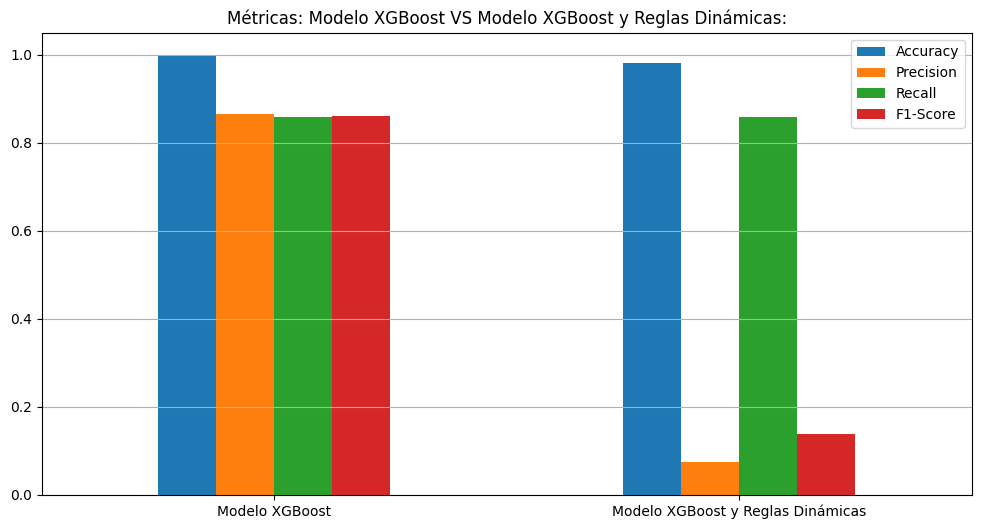

In [15]:
# Comparar resultados
metrics_xgb_reglas = {
    "Accuracy": accuracy_score(y_test, X_test_reglas['fraud_prediction_dynamic']),
    "Precision": precision_score(y_test, X_test_reglas['fraud_prediction_dynamic']),
    "Recall": recall_score(y_test, X_test_reglas['fraud_prediction_dynamic']),
    "F1-Score": f1_score(y_test, X_test_reglas['fraud_prediction_dynamic'])
}
metrics = pd.DataFrame({
    "Modelo XGBoost": metrics_xgb,
    "Modelo XGBoost y Reglas Dinámicas": metrics_xgb_reglas
}).T

print("\nMétricas: Modelo XGBoost VS Modelo XGBoost y Reglas Dinámicas:")
display(metrics)

metrics.plot(kind='bar', figsize=(12,6))
plt.title('Métricas: Modelo XGBoost VS Modelo XGBoost y Reglas Dinámicas:')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## 5. Función de ejcución del código

Como el propósito inicial era la creación de un sistema que podrá ejecutarse de manera periódica u on demand, sería más conveniente crear una solo función que ejecutará el código.

In [16]:
def predict_xgb_reglas(xgb_model, df_file, scaler, output_folder='Daily_Batch_Result'):
   
    # Cargar los datos diarios
    df = pd.read_csv(df_file)

    df_batch = df.copy()

    # Escalar las variables Amount y Time
    try:
        df_batch[['scaled_amount']] = scaler.transform(df_batch[['Amount']])
        df_batch[['scaled_time']] = scaler.transform(df_batch[['Time']])

    except Exception as e:
        raise ValueError(f"Error: {e}")

    df_batch = df_batch.drop(columns=['Class', 'Amount', 'Time'])

    # Predecir el resultado
    X_daily = df_batch.copy()
    y_pred_daily = xgb_model.predict(X_daily)
    
    # Aplicar las reglas dinámicas
    X_daily_reglas = X_daily.copy()
    X_daily_reglas['fraud_prediction'] = y_pred_daily
    X_daily_reglas['fraud_prediction_dynamic'] = y_pred_daily

    X_daily_reglas.loc[
        (X_daily_reglas['scaled_amount'] > 0.9) |
        (X_daily_reglas['scaled_time'] < -1.9) &
        (X_daily_reglas['fraud_prediction'] == 0),
        'fraud_prediction_dynamic'
    ] = 1

    # Guardar los resultados de las predicciones
    os.makedirs(output_folder, exist_ok=True)
    date = datetime.now().strftime('%Y-%m-%d')
    file = f'prediction_{date}.csv'
    ruta = os.path.join(output_folder, file)
    X_daily_reglas.to_csv(ruta, index=False)

    return X_daily_reglas

In [17]:
predict_xgb_reglas(xgb_model, '/kaggle/input/creditcardfraud/creditcard.csv', scaler, output_folder='Daily_Batch_Result')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,fraud_prediction,fraud_prediction_dynamic
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.992971,-1.996122,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996065,-1.996122,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.988148,-1.996100,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.993521,-1.996100,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.994648,-1.996079,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-1.996105,1.642370,0,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-1.995599,1.642391,0,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-1.994692,1.642412,0,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-1.995911,1.642412,0,0


Esta función ejecuta el modelo que hemos entrenado previamente para predecir el fraude, aplica las reglas, si están presentes, y guarda el resultado en un csv.